In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
mf_temporal = pd.read_csv("./Data/NCHS_-_Death_rates_and_life_expectancy_at_birth.csv")

In [16]:
m_white = mf_temporal[(mf_temporal.Race == "White") & (mf_temporal.Sex == "Male")]
m_black = mf_temporal[(mf_temporal.Race == "Black") & (mf_temporal.Sex == "Male")]
f_white = mf_temporal[(mf_temporal.Race == "White") & (mf_temporal.Sex == "Female")]
f_black = mf_temporal[(mf_temporal.Race == "Black") & (mf_temporal.Sex == "Female")]
all_races = mf_temporal[(mf_temporal.Race == "All Races") & (mf_temporal.Sex == "Both Sexes")]

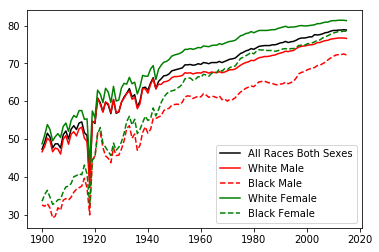

In [254]:
plt.plot(all_races.Year, all_races['Average Life Expectancy (Years)'], 'k-', label='All Races Both Sexes')
plt.plot(m_white.Year, m_white['Average Life Expectancy (Years)'], 'r-', label = 'White Male')
plt.plot(m_black.Year, m_black['Average Life Expectancy (Years)'], 'r--', label = 'Black Male')
plt.plot(f_white.Year, f_white['Average Life Expectancy (Years)'], 'g-', label = 'White Female')
plt.plot(f_black.Year, f_black['Average Life Expectancy (Years)'], 'g--', label = 'Black Female')
plt.legend(loc='lower right')

In [56]:
ihme_OH = pd.read_csv('./Data/IHME_county_data_LifeExpectancy_OHIO.csv')
activity_OH = pd.read_csv('./Data/IHME_county_data_PhysicalActivity_OHIO.csv')
obesity_OH = pd.read_csv('./Data/IHME_county_data_Obesity_OHIO.csv')

In [59]:
ihme_Cbus = ihme_OH[(ihme_OH['State/County'] == 'United States') | (ihme_OH['State/County'] == 'Ohio') | (ihme_OH['State/County'] == 'Delaware') | (ihme_OH['State/County'] == 'Fairfield') | (ihme_OH['State/County'] == 'Franklin') | (ihme_OH['State/County'] == 'Pickaway')]
activity_Cbus = activity_OH[(activity_OH['State/County'] == 'United States') | (activity_OH['State/County'] == 'Ohio') | (activity_OH['State/County'] == 'Delaware') | (activity_OH['State/County'] == 'Fairfield') | (activity_OH['State/County'] == 'Franklin') | (activity_OH['State/County'] == 'Pickaway')]
obesity_Cbus = obesity_OH[(obesity_OH['State/County'] == 'United States') | (obesity_OH['State/County'] == 'Ohio') | (obesity_OH['State/County'] == 'Delaware') | (obesity_OH['State/County'] == 'Fairfield') | (obesity_OH['State/County'] == 'Franklin') | (obesity_OH['State/County'] == 'Pickaway')]

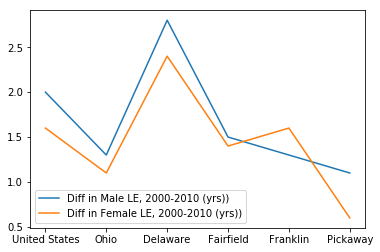

In [72]:
#Grouped horizontal bar chart for all counties
plt.plot(ihme_Cbus['State/County'], ihme_Cbus['Male life expectancy, 2010 (years)'] - ihme_Cbus['Male life expectancy, 2000 (years)'], label="Diff in Male LE, 2000-2010 (yrs)")
plt.plot(ihme_Cbus['State/County'], ihme_Cbus['Female life expectancy, 2010 (years)'] - ihme_Cbus['Female life expectancy, 2000 (years)'], label="Diff in Female LE, 2000-2010 (yrs)")
plt.legend(loc='lower left')

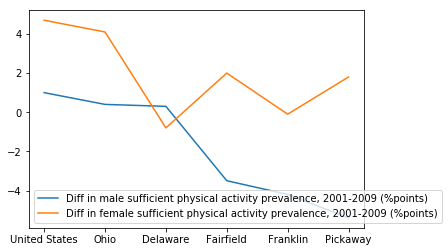

In [181]:
plt.plot(activity_Cbus['State/County'], activity_Cbus['Difference in male sufficient physical activity prevalence, 2001-2009 (percentage points)'], label="Diff in male sufficient physical activity prevalence, 2001-2009 (%points)")
plt.plot(activity_Cbus['State/County'], activity_Cbus['Difference in female sufficient physical activity prevalence, 2001-2009 (percentage points)'], label="Diff in female sufficient physical activity prevalence, 2001-2009 (%points)")
plt.legend(bbox_to_anchor=(0,0.001), loc="lower left")

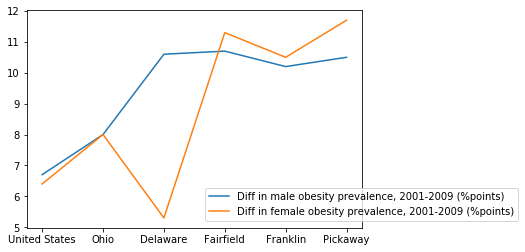

In [182]:
plt.plot(obesity_Cbus['State/County'], obesity_Cbus['Difference in male obesity prevalence, 2001-2009 (percentage points)'], label="Diff in male obesity prevalence, 2001-2009 (%points)")
plt.plot(obesity_Cbus['State/County'], obesity_Cbus['Difference in female obesity prevalence, 2001-2009 (percentage points)'], label="Diff in female obesity prevalence, 2001-2009 (%points)")
plt.legend(bbox_to_anchor=(1,0.01), loc="lower center")

In [132]:
race_deaths_OH = pd.read_csv('./Data/Black_White_Mortality_OH_County_2000_2015.csv')
race_deaths_OH['Deaths/Pop'] = race_deaths_OH.Deaths / race_deaths_OH.Population

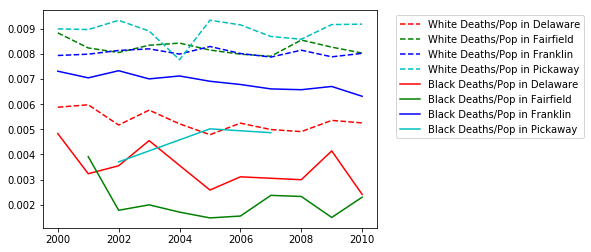

In [185]:
delaware = race_deaths_OH[(race_deaths_OH.County == 'Delaware County, OH') & (race_deaths_OH['Race'] == "Black or African American")]
fairfield = race_deaths_OH[(race_deaths_OH.County == 'Fairfield County, OH') & (race_deaths_OH['Race'] == "Black or African American")]
franklin = race_deaths_OH[(race_deaths_OH.County == 'Franklin County, OH') & (race_deaths_OH['Race'] == "Black or African American")]
pickaway = race_deaths_OH[(race_deaths_OH.County == 'Pickaway County, OH') & (race_deaths_OH['Race'] == "Black or African American")]
delaware_w = race_deaths_OH[(race_deaths_OH.County == 'Delaware County, OH') & (race_deaths_OH['Race'] == "White")]
fairfield_w = race_deaths_OH[(race_deaths_OH.County == 'Fairfield County, OH') & (race_deaths_OH['Race'] == "White")]
franklin_w = race_deaths_OH[(race_deaths_OH.County == 'Franklin County, OH') & (race_deaths_OH['Race'] == "White")]
pickaway_w = race_deaths_OH[(race_deaths_OH.County == 'Pickaway County, OH') & (race_deaths_OH['Race'] == "White")]


plt.plot(delaware_w.Year, delaware_w['Deaths/Pop'], 'r--', label = "White Deaths/Pop in Delaware")
plt.plot(fairfield_w.Year, fairfield_w['Deaths/Pop'], 'g--', label = "White Deaths/Pop in Fairfield")
plt.plot(franklin_w.Year, franklin_w['Deaths/Pop'], 'b--', label = "White Deaths/Pop in Franklin")
plt.plot(pickaway_w.Year, pickaway_w['Deaths/Pop'], 'c--', label = "White Deaths/Pop in Pickaway")
plt.plot(delaware.Year, delaware['Deaths/Pop'], 'r-', label = "Black Deaths/Pop in Delaware")
plt.plot(fairfield.Year, fairfield['Deaths/Pop'],'g-', label = "Black Deaths/Pop in Fairfield")
plt.plot(franklin.Year, franklin['Deaths/Pop'], 'b-', label = "Black Deaths/Pop in Franklin")
plt.plot(pickaway.Year, pickaway['Deaths/Pop'], 'c-', label = "Black Deaths/Pop in Pickaway")
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")

In [319]:
causes = pd.read_csv('./Data/Black_White_MortalityCause_Temporal_OH_2000_2015.csv')
causes['Age Adjusted Rate'] = causes['Age Adjusted Rate'].str.replace("\(Unreliable\)", "").apply(float)
causes['Deaths'] = (causes['Deaths']*10000) / causes['Population']

In [320]:
causes05_W = causes[(causes.Year == 2005) & (causes.Race == "White")]
causes05_B = causes[(causes.Year == 2005) & (causes.Race == "Black or African American")]
causes15_W = causes[(causes.Year == 2015) & (causes.Race == "White")]
causes15_B = causes[(causes.Year == 2015) & (causes.Race == "Black or African American")]
causes05_W = causes05_W.groupby(['Cause of death'])['Deaths'].agg(["sum"]).reset_index().sort_values(by = ['sum'], ascending = False)
causes15_W = causes15_W.groupby(['Cause of death'])['Deaths'].agg(["sum"]).reset_index().sort_values(by = ['sum'], ascending = False)
causes05_B = causes05_B.groupby(['Cause of death'])['Deaths'].agg(["sum"]).reset_index().sort_values(by = ['sum'], ascending = False)
causes15_B = causes15_B.groupby(['Cause of death'])['Deaths'].agg(["sum"]).reset_index().sort_values(by = ['sum'], ascending = False)

In [321]:
causesW = causes05_W.merge(causes15_W, on='Cause of death', how='left')
causesW['Diff in Deaths/Population 2015-2005'] = causesW['sum_y'] - causesW['sum_x']
causesW = causesW.dropna(axis=0)

causesB = causes05_B.merge(causes15_B, on='Cause of death', how='left')
causesB['Diff in Deaths/Population 2015-2005'] = causesB['sum_y'] - causesB['sum_x']
causesB = causesB.dropna(axis=0)

In [322]:
causesW = causesW.sort_values(by='Diff in Deaths/Population 2015-2005')
causesB = causesB.sort_values(by='Diff in Deaths/Population 2015-2005')

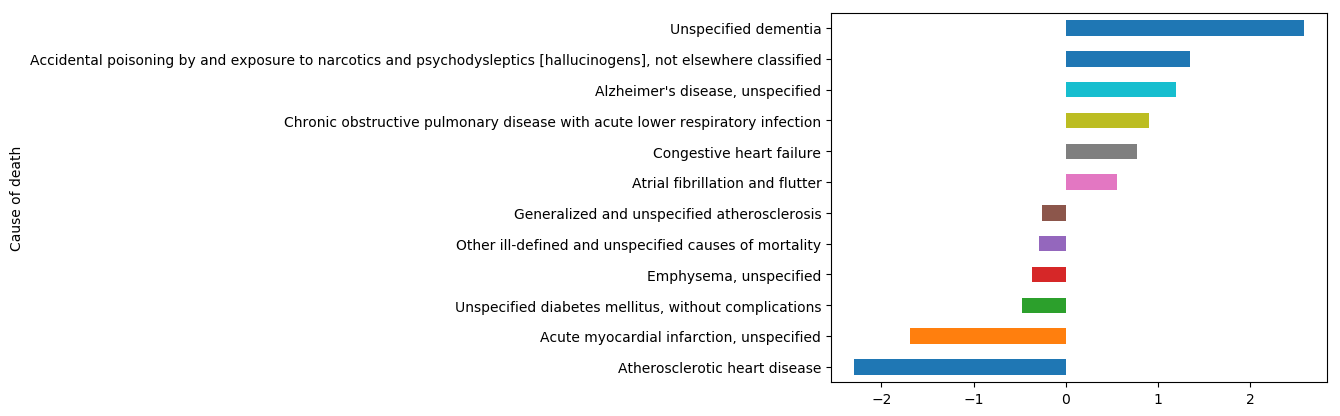

In [327]:
causesW_12 = [causesW.head(6), causesW.tail(6)]
causesW_12 = pd.concat(causesW_12)
causesW_12.plot.barh(x='Cause of death', y='Diff in Deaths/Population 2015-2005', legend=False)

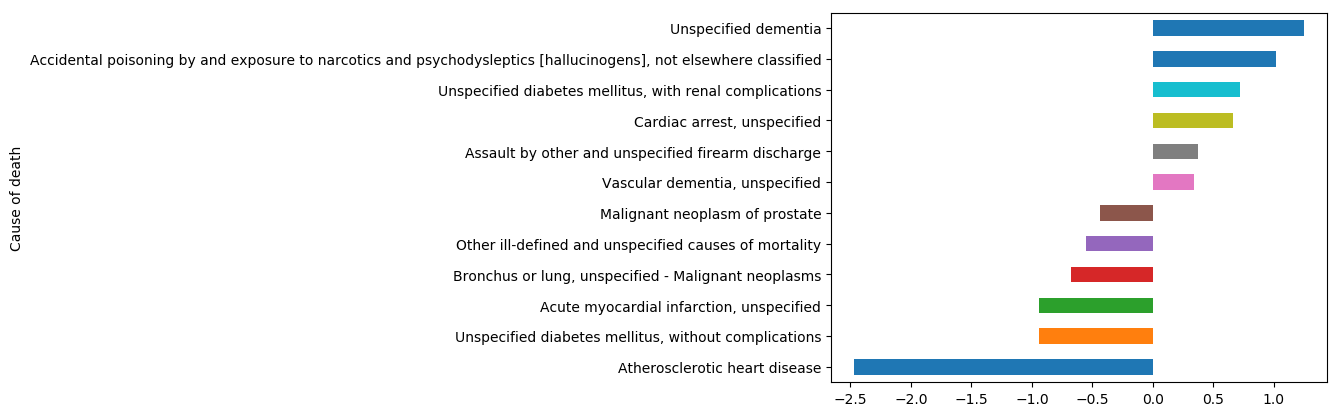

In [328]:
causesB_12 = [causesB.head(6), causesB.tail(6)]
causesB_12 = pd.concat(causesB_12)
causesB_12.plot.barh(x='Cause of death', y='Diff in Deaths/Population 2015-2005', legend=False)

In [329]:
income_OH = pd.read_csv('./Data/LE_M_F_County_Income_2015.csv')

In [330]:
print income_OH.columns

Index([u'cty', u'county_name', u'cty_pop2000', u'cz', u'cz_name',
       u'cz_pop2000', u'statename', u'state_id', u'stateabbrv', u'le_agg_q1_F',
       u'le_raceadj_q1_F', u'le_agg_q2_F', u'le_raceadj_q2_F', u'le_agg_q3_F',
       u'le_raceadj_q3_F', u'le_agg_q4_F', u'le_raceadj_q4_F', u'le_agg_q1_M',
       u'le_raceadj_q1_M', u'le_agg_q2_M', u'le_raceadj_q2_M', u'le_agg_q3_M',
       u'le_raceadj_q3_M', u'le_agg_q4_M', u'le_raceadj_q4_M',
       u'sd_le_agg_q1_F', u'sd_le_raceadj_q1_F', u'sd_le_agg_q2_F',
       u'sd_le_raceadj_q2_F', u'sd_le_agg_q3_F', u'sd_le_raceadj_q3_F',
       u'sd_le_agg_q4_F', u'sd_le_raceadj_q4_F', u'sd_le_agg_q1_M',
       u'sd_le_raceadj_q1_M', u'sd_le_agg_q2_M', u'sd_le_raceadj_q2_M',
       u'sd_le_agg_q3_M', u'sd_le_raceadj_q3_M', u'sd_le_agg_q4_M',
       u'sd_le_raceadj_q4_M', u'count_q1_F', u'count_q2_F', u'count_q3_F',
       u'count_q4_F', u'count_q1_M', u'count_q2_M', u'count_q3_M',
       u'count_q4_M'],
      dtype='object')


In [333]:
income = pd.read_csv('./Data/LE_M_F_States_Income_2015.csv')

In [334]:
print income.columns

Index([u'st', u'stateabbrv', u'statename', u'le_agg_q1_F', u'le_raceadj_q1_F',
       u'le_agg_q2_F', u'le_raceadj_q2_F', u'le_agg_q3_F', u'le_raceadj_q3_F',
       u'le_agg_q4_F', u'le_raceadj_q4_F', u'le_agg_q1_M', u'le_raceadj_q1_M',
       u'le_agg_q2_M', u'le_raceadj_q2_M', u'le_agg_q3_M', u'le_raceadj_q3_M',
       u'le_agg_q4_M', u'le_raceadj_q4_M', u'sd_le_agg_q1_F',
       u'sd_le_raceadj_q1_F', u'sd_le_agg_q2_F', u'sd_le_raceadj_q2_F',
       u'sd_le_agg_q3_F', u'sd_le_raceadj_q3_F', u'sd_le_agg_q4_F',
       u'sd_le_raceadj_q4_F', u'sd_le_agg_q1_M', u'sd_le_raceadj_q1_M',
       u'sd_le_agg_q2_M', u'sd_le_raceadj_q2_M', u'sd_le_agg_q3_M',
       u'sd_le_raceadj_q3_M', u'sd_le_agg_q4_M', u'sd_le_raceadj_q4_M',
       u'count_q1_F', u'count_q2_F', u'count_q3_F', u'count_q4_F',
       u'count_q1_M', u'count_q2_M', u'count_q3_M', u'count_q4_M'],
      dtype='object')
